In [1]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

In [2]:
class_labels = [
      "airplane", "automobile", "bird", "cat", "deer",
      "dog", "frog", "horse", "ship", "truck"
    ]

In [3]:
model = load_model('cifar10CNN_30epochs.h5')

In [4]:
def preprocess_img(img_path, target_size=(32, 32)):
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, target_size)
  img = img.astype(np.float32) / 255.0
  img = np.expand_dims(img, axis=0)
  return img
# to preprocess the image so as to make it's dimensions appropriate for the CNN model

def predict_img(img_path):
  img = preprocess_img(img_path)
  prediction = model.predict(img)
  label_index = np.argmax(prediction)
  label = class_labels[label_index]

  plt.imshow(cv2.imread(img_path)[:, :, ::-1]) # Convert BGR to RGB for display
  plt.title(f"Prediction: {label}")
  plt.axis('off')
  plt.show()

  print(f"Prected Label: {label}")
  print(f"Confidence Scores: {prediction[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


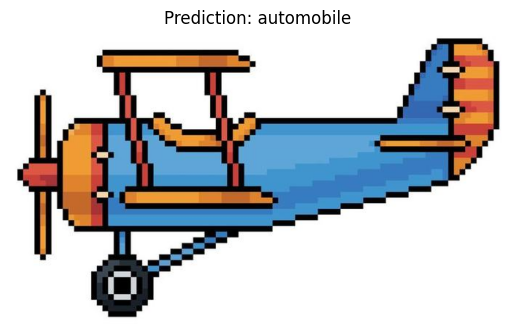

Prected Label: automobile
Confidence Scores: [2.6622394e-04 9.3715441e-01 3.8389198e-09 7.5197821e-09 3.1226244e-11
 3.0138450e-10 6.6044674e-12 2.4244587e-08 4.9251033e-05 6.2530071e-02]


In [5]:
img_path = "/content/airplane.jpg"
predict_img(img_path)
# top 1% error

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


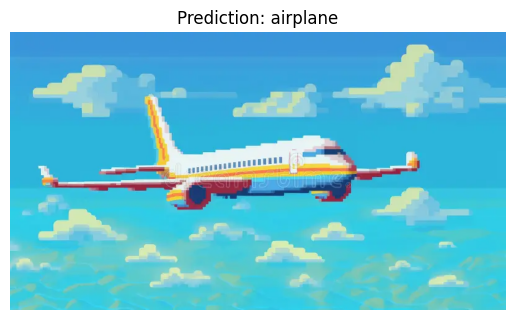

Prected Label: airplane
Confidence Scores: [9.6910131e-01 2.8261147e-05 1.8762777e-02 9.4901756e-05 8.6334785e-03
 1.0324521e-06 1.7238859e-05 1.9889891e-05 3.2761001e-03 6.5054555e-05]


In [12]:
img_path = "/content/plane.webp"
predict_img(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


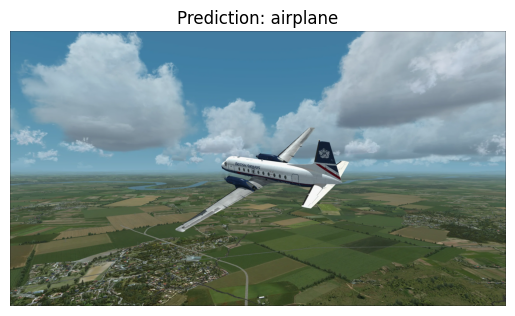

Prected Label: airplane
Confidence Scores: [9.8778230e-01 2.7393634e-04 8.7465141e-03 6.4419561e-05 1.5973164e-03
 1.2451655e-06 6.5602076e-06 2.4769632e-05 1.0561312e-03 4.4684537e-04]


In [11]:
img_path = "/content/planeHD.webp"
predict_img(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


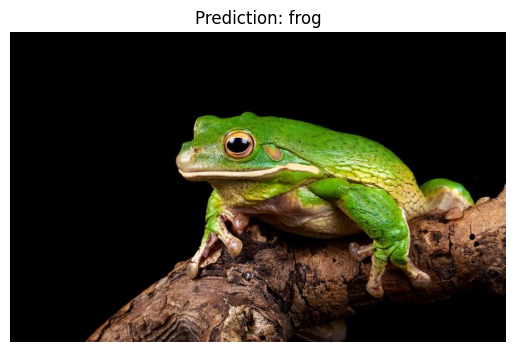

Prected Label: frog
Confidence Scores: [1.7306763e-21 8.7135004e-14 1.9739436e-10 5.8043775e-10 2.2650328e-14
 1.6735489e-14 1.0000000e+00 1.2198441e-22 4.5138353e-18 8.0496184e-15]


In [10]:
img_path = "/content/frog.jpg"
predict_img(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


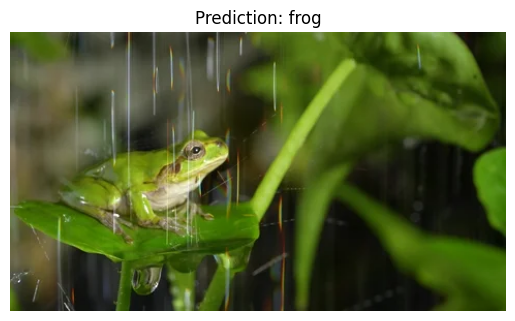

Prected Label: frog
Confidence Scores: [6.4014425e-06 4.5330421e-06 4.8848200e-03 2.0845748e-02 3.6800399e-01
 2.6207319e-03 6.0347152e-01 1.5414652e-04 3.9106048e-06 4.1957705e-06]


In [9]:
img_path = "/content/froghard.webp"
predict_img(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


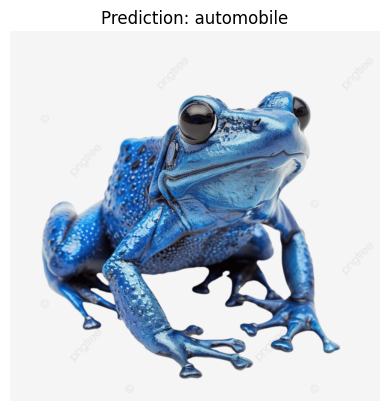

Prected Label: automobile
Confidence Scores: [1.5448089e-06 9.8123372e-01 2.3574705e-07 2.9937436e-07 2.2906221e-09
 1.3552928e-07 2.2610414e-04 5.2447864e-09 8.4922203e-06 1.8529454e-02]


In [16]:
img_path = "/content/fogblue.png"
predict_img(img_path)
# big error (more than top 5%) - as blue frog is classsified as automobile, with confidence score 9 because airplane pictures have blue skies hence it mustve done that

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


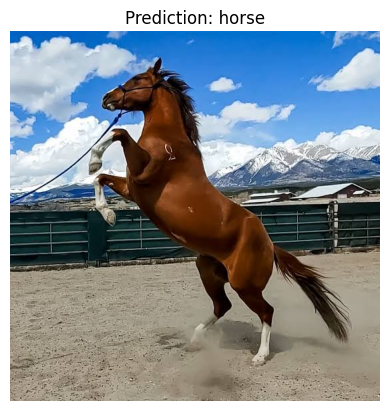

Prected Label: horse
Confidence Scores: [4.1447698e-17 9.9338540e-29 1.9650506e-15 1.2531147e-14 8.8626118e-10
 4.1426709e-08 9.0610828e-27 1.0000000e+00 3.2042768e-29 4.0245017e-18]


In [17]:
img_path = "/content/images.jpeg"
predict_img(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


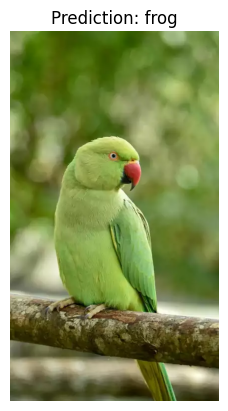

Prected Label: frog
Confidence Scores: [3.43183215e-09 3.93913524e-09 9.93670821e-02 1.08466986e-04
 2.01984585e-05 2.61080413e-06 9.00501668e-01 3.05613268e-09
 2.77098344e-09 5.01894526e-08]


In [19]:
img_path = "/content/parrot.webp"
predict_img(img_path)
# one more error, because frog is green so , i need more accuracy through colour it shouldnt be doing classific, texture is also imp

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


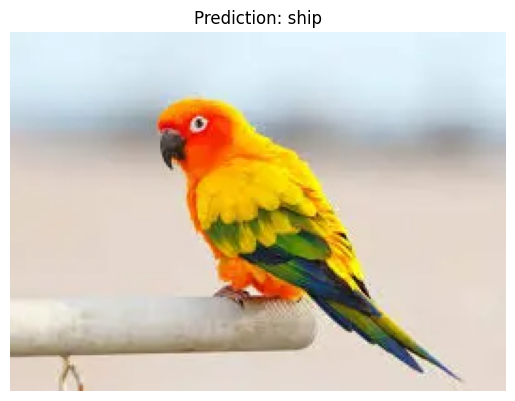

Prected Label: ship
Confidence Scores: [8.1445426e-02 2.9490847e-04 3.7037677e-01 7.3620463e-03 1.3316947e-04
 3.4209882e-04 5.5518616e-03 9.5033705e-05 5.3336746e-01 1.0311537e-03]


In [20]:
img_path = "/content/parrotyellow.webp"
predict_img(img_path)
# okay it cannot classify birds properly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


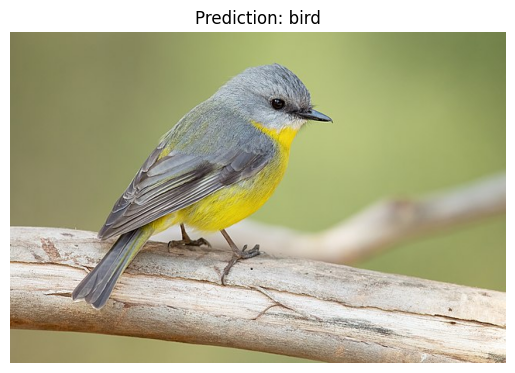

Prected Label: bird
Confidence Scores: [2.2040595e-06 3.5663490e-11 9.9979657e-01 1.7115108e-05 5.6761962e-07
 5.7961456e-06 1.7775584e-04 3.4149640e-08 1.9955701e-08 5.8849109e-10]


In [21]:
image_path = "/content/Eopsaltria_australis_-_Mogo_Campground.jpg"
predict_img(image_path)
# wow okay, so it can detect brown and common known birds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


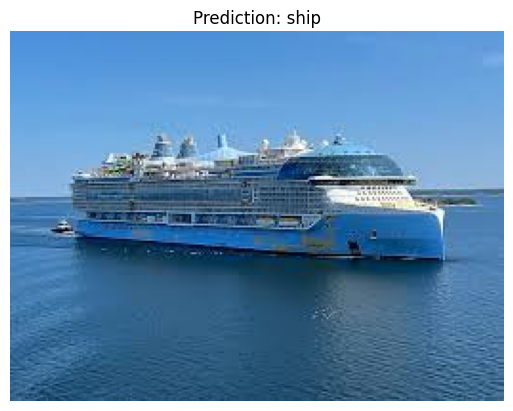

Prected Label: ship
Confidence Scores: [9.36832439e-05 2.75918630e-08 1.94286008e-06 1.13862475e-08
 9.67453873e-13 1.29777496e-13 2.97970953e-10 2.05627168e-13
 9.99904275e-01 2.53202472e-08]


In [22]:
image_path = "/content/ship.jpeg"
predict_img(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


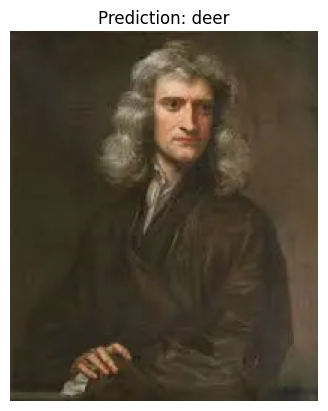

Prected Label: deer
Confidence Scores: [2.2485598e-03 6.2928266e-05 7.0339948e-02 1.6799968e-01 3.7190408e-01
 2.8145209e-01 1.0061818e-02 9.4993524e-02 4.3543766e-04 5.0188426e-04]


In [23]:
image_path = "/content/newton.webp"
predict_img(image_path)
# putting image that isnt there